# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
output_data_file

'output_data/cities.csv'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL to perform API calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# set up lists to hold weather reponse info
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#set city counter
city_count = 0

print(f"Beginning Data Retrieval")
print("----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:

    response = requests.get(query_url + city).json()
   
    #Increase city counter by one each loop
    city_count += 1
    
    #Try exception error for city not found to allow API to continue to run
    try:
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f"City Found! Processing Record {city_count} for City: {city}")
        
    except:
        print(f"City not found. Skipping...")
        pass
    
    #set limit of API requests done at one time (too many caused someone to get blocked)
    time.sleep(1)
    
print("------------------------")
print("Data Retrieval Complete ")
print("------------------------")

Beginning Data Retrieval
----------------------------
City Found! Processing Record 1 for City: tutoia
City Found! Processing Record 2 for City: severo-kurilsk
City Found! Processing Record 3 for City: bongandanga
City Found! Processing Record 4 for City: lasa
City Found! Processing Record 5 for City: uniontown
City Found! Processing Record 6 for City: bredasdorp
City Found! Processing Record 7 for City: vaini
City Found! Processing Record 8 for City: bluff
City Found! Processing Record 9 for City: east london
City Found! Processing Record 10 for City: upernavik
City Found! Processing Record 11 for City: ushuaia
City Found! Processing Record 12 for City: vestmannaeyjar
City Found! Processing Record 13 for City: port elizabeth
City Found! Processing Record 14 for City: ixtapa
City Found! Processing Record 15 for City: belaya gora
City Found! Processing Record 16 for City: torbay
City Found! Processing Record 17 for City: sur
City Found! Processing Record 18 for City: rio grande
City Fou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#check if number of cities found is still over 500
#use any var except city
len(long)

577

In [7]:
len(cities)
#since city lenght is diff from other lists generated from api, 
#have to use from_dict to create df

622

In [8]:
# Create a data frame from dictionary
weather_raw = {
    "City": cities,
    "Lat": lat,
    "Lng": long,
    "Max_Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
                }
weather_data = pd.DataFrame.from_dict(weather_raw, orient= 'index')
weather_data = weather_data.transpose()
weather_data

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tutoia,-2.7619,-42.2744,91.38,66,15,15.59,BR,1638897196
1,severo-kurilsk,50.6789,156.125,30.16,62,95,27.56,RU,1638897198
2,bongandanga,1.5,21.05,72.36,96,99,2.08,CD,1638897201
3,lasa,46.6166,10.7002,28.31,64,5,2.91,IT,1638897100
4,uniontown,39.9001,-79.7164,32.45,44,97,4,US,1638897111
...,...,...,...,...,...,...,...,...,...
617,uray,None,None,None,None,None,None,None,None
618,dedza,None,None,None,None,None,None,None,None
619,rorvik,None,None,None,None,None,None,None,None
620,roma,None,None,None,None,None,None,None,None


In [9]:
#export dataframe to a csv file
weather_data.to_csv('weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
weather_data[weather_data['Humidity'].gt(100)].index
#No cities in df with humidity over 100, so can cont with plotting data

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

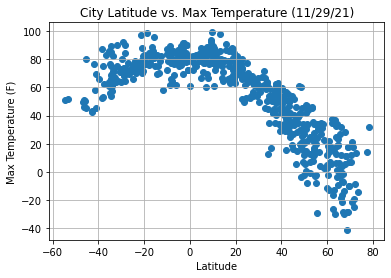

In [11]:
lat_scatter = weather_data["Lat"]
temp_scatter = weather_data["Max_Temp"]

plt.scatter(lat_scatter, temp_scatter)
plt.title("City Latitude vs. Max Temperature (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../../python-api-challenge/WeatherPy/lat_vs_temp_plot.png")

What this plot is showing is that as latitude increases from -60 to 0, max temperature increases, but as it goes from 0 to 80, max tempereature decreases. 

## Latitude vs. Humidity Plot

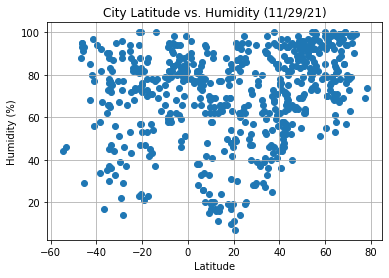

In [12]:
lat_scatter = weather_data["Lat"]
hum_scatter = weather_data["Humidity"]

plt.scatter(lat_scatter, hum_scatter)
plt.title("City Latitude vs. Humidity (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../../python-api-challenge/WeatherPy/lat_vs_humidity_plot.png")

This plot is showing that there doesn't seem to be much of a relationship between latitude and the humidity of a city. There seems to be a higher density of cities in higher latitude and higher humidity, suggesting a slightly positive relationship between the two.

## Latitude vs. Cloudiness Plot

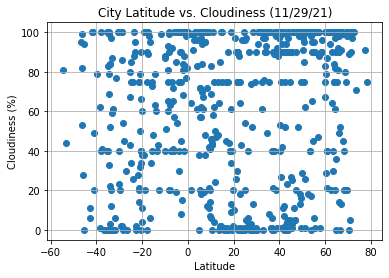

In [13]:
lat_scatter = weather_data["Lat"]
cloud_scatter = weather_data["Cloudiness"]

plt.scatter(lat_scatter, cloud_scatter)
plt.title("City Latitude vs. Cloudiness (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../../python-api-challenge/WeatherPy/lat_vs_cloudiness.png")

This plot shows that there doesn't seem to be a relationshio between latitude and cloudiness, since the data point seem uniformly spread out.

## Latitude vs. Wind Speed Plot

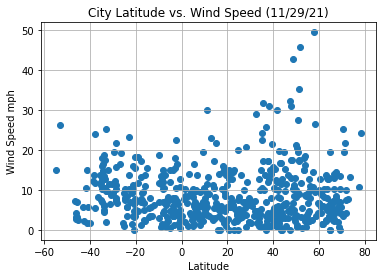

In [14]:
lat_scatter = weather_data["Lat"]
wind_scatter = weather_data["Wind Speed"]

plt.scatter(lat_scatter, wind_scatter)
plt.title("City Latitude vs. Wind Speed (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
plt.grid()
plt.savefig("../../python-api-challenge/WeatherPy/lat_vs_wind_speed_plot.png")

This plot shows a slightly positive relationship between latitude and wind speed. The majority of the data points seem uniformly spread out, with a couple cities at higher latitudes experiencing higher wind speeds.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.9.
The linear regression model is y = -1.36x + 95.82.


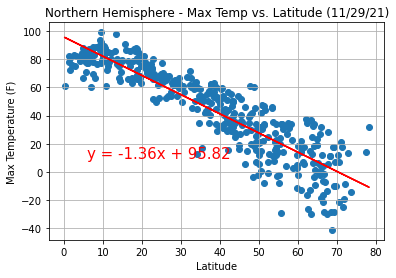

<Figure size 432x288 with 0 Axes>

In [38]:
n_lat_scatter = weather_data.loc[weather_data["Lat"] >= 0, "Lat"]
temp_scatter = weather_data.loc[weather_data["Lat"] >= 0, "Max_Temp"]

#correlation r-value
ntl_r = st.pearsonr(n_lat_scatter, temp_scatter)
print(f"The r-value is: {round(ntl_r[0],2)}.")

#linear regression
#changed var types to float bc it was object and wouldn't produce a scatterplot
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_scatter.astype(float), temp_scatter.astype(float))
regress_values = n_lat_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")

#plot linear regression line
plt.scatter(n_lat_scatter, temp_scatter)
plt.plot(n_lat_scatter,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#add labels and save file
plt.title("Northern Hemisphere - Max Temp vs. Latitude (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

plt.savefig("../../python-api-challenge/WeatherPy/nothern_lat_vs_temp_plot.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.59.
The linear regression model is y = 0.49x + 84.97.


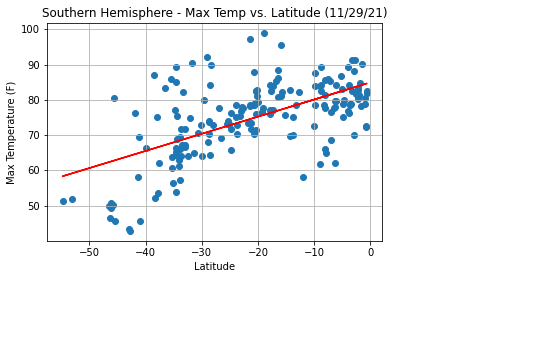

<Figure size 432x288 with 0 Axes>

In [39]:
s_lat_scatter = weather_data.loc[weather_data["Lat"] < 0, "Lat"]
s_temp_scatter = weather_data.loc[weather_data["Lat"] < 0, "Max_Temp"]

#correlation r-value
ntl_r = st.pearsonr(s_lat_scatter, s_temp_scatter)
print(f"The r-value is: {round(ntl_r[0],2)}.")

#linear regression
#changed var types to float bc it was object and wouldn't produce a scatterplot
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_scatter.astype(float), s_temp_scatter.astype(float))
regress_values = s_lat_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")

#plot linear regression line
plt.scatter(s_lat_scatter, s_temp_scatter)
plt.plot(s_lat_scatter,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#add labels and save file
plt.title("Southern Hemisphere - Max Temp vs. Latitude (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

plt.savefig("../../python-api-challenge/WeatherPy/southern_lat_vs_temp_plot.png")

What these pair of plots are showing is that in the Southern hemisphere, as latitude increases, so does max temperature, and in the Northern hemisphere, as latitude increases, max temperature decreases. Overall, this shows that as you get closer to the equator, temperature rises, and that the farther away you go from the equator, the lower the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.44.
The linear regression model is y = 0.49x + 52.29.


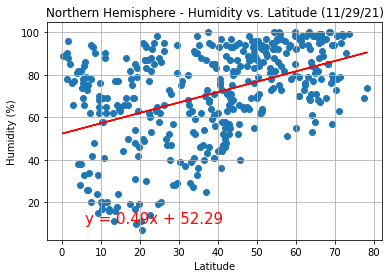

<Figure size 432x288 with 0 Axes>

In [40]:
n_lat_scatter = weather_data.loc[weather_data["Lat"] >= 0, "Lat"]
n_humidity_scatter = weather_data.loc[weather_data["Lat"] >= 0, "Humidity"]

#correlation r-value
ntl_r = st.pearsonr(n_lat_scatter, n_humidity_scatter)
print(f"The r-value is: {round(ntl_r[0],2)}.")

#linear regression
#changed var types to float bc it was object and wouldn't produce a scatterplot
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_scatter.astype(float), n_humidity_scatter.astype(float))
regress_values = n_lat_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")

#plot linear regression line
plt.scatter(n_lat_scatter, n_humidity_scatter)
plt.plot(n_lat_scatter,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#add labels and save file
plt.title("Northern Hemisphere - Humidity vs. Latitude (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

plt.savefig("../../python-api-challenge/WeatherPy/northern_lat_vs_humidity_plot.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.17.
The linear regression model is y = 0.25x + 75.7.


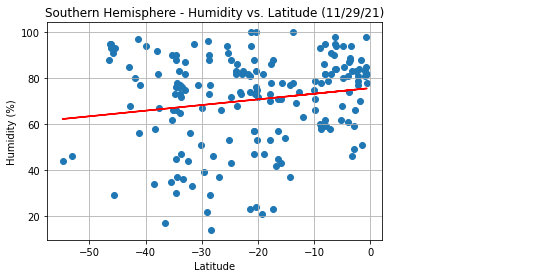

<Figure size 432x288 with 0 Axes>

In [41]:
s_lat_scatter = weather_data.loc[weather_data["Lat"] < 0, "Lat"]
s_humidity_scatter = weather_data.loc[weather_data["Lat"] < 0, "Humidity"]

#correlation r-value
ntl_r = st.pearsonr(s_lat_scatter, s_humidity_scatter)
print(f"The r-value is: {round(ntl_r[0],2)}.")

#linear regression
#changed var types to float bc it was object and wouldn't produce a scatterplot
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_scatter.astype(float), s_humidity_scatter.astype(float))
regress_values = s_lat_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")

#plot linear regression line
plt.scatter(s_lat_scatter, s_humidity_scatter)
plt.plot(s_lat_scatter,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#add labels and save file
plt.title("Southern Hemisphere - Humidity vs. Latitude (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

plt.savefig("../../python-api-challenge/WeatherPy/southern_lat_vs_humidity_plot.png")

What these pair of plots show is that the higher the latitude, the higher the percentage of humidity in the region. Although there is a weak correlation, both plots shows a positive relationship, and the equator does not seem to make an influence.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19.
The linear regression model is y = 0.37x + 45.91.


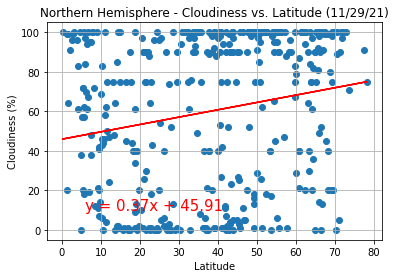

<Figure size 432x288 with 0 Axes>

In [42]:
n_lat_scatter = weather_data.loc[weather_data["Lat"] >= 0, "Lat"]
n_cloudy_scatter = weather_data.loc[weather_data["Lat"] >= 0, "Cloudiness"]

#correlation r-value
ntl_r = st.pearsonr(n_lat_scatter, n_cloudy_scatter)
print(f"The r-value is: {round(ntl_r[0],2)}.")

#linear regression
#changed var types to float bc it was object and wouldn't produce a scatterplot
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_scatter.astype(float), n_cloudy_scatter.astype(float))
regress_values = n_lat_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")

#plot linear regression line
plt.scatter(n_lat_scatter, n_cloudy_scatter)
plt.plot(n_lat_scatter,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#add labels and save file
plt.title("Northern Hemisphere - Cloudiness vs. Latitude (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

plt.savefig("../../python-api-challenge/WeatherPy/northern_lat_vs_cloudy_plot.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24.
The linear regression model is y = 0.61x + 69.9.


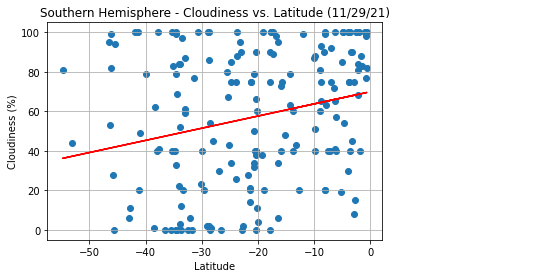

<Figure size 432x288 with 0 Axes>

In [43]:
s_lat_scatter = weather_data.loc[weather_data["Lat"] < 0, "Lat"]
s_cloudy_scatter = weather_data.loc[weather_data["Lat"] < 0, "Cloudiness"]

#correlation r-value
ntl_r = st.pearsonr(s_lat_scatter, s_cloudy_scatter)
print(f"The r-value is: {round(ntl_r[0],2)}.")

#linear regression
#changed var types to float bc it was object and wouldn't produce a scatterplot
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_scatter.astype(float), s_cloudy_scatter.astype(float))
regress_values = s_lat_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")

#plot linear regression line
plt.scatter(s_lat_scatter, s_cloudy_scatter)
plt.plot(s_lat_scatter,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#add labels and save file
plt.title("Southern Hemisphere - Cloudiness vs. Latitude (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

plt.savefig("../../python-api-challenge/WeatherPy/southern_lat_vs_cloudy_plot.png")

Same as the humidity charts, these pair of plots show a very weak positive correlation. Generally, as latitude increases, so does the percentage of cloudiness in the region.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1.
The linear regression model is y = 0.04x + 7.14.


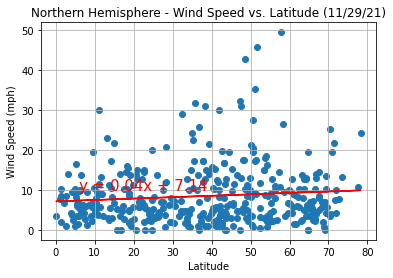

<Figure size 432x288 with 0 Axes>

In [44]:
n_lat_scatter = weather_data.loc[weather_data["Lat"] >= 0, "Lat"]
n_wind_scatter = weather_data.loc[weather_data["Lat"] >= 0, "Wind Speed"]

#correlation r-value
ntl_r = st.pearsonr(n_lat_scatter, n_wind_scatter)
print(f"The r-value is: {round(ntl_r[0],2)}.")

#linear regression
#changed var types to float bc it was object and wouldn't produce a scatterplot
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_scatter.astype(float), n_wind_scatter.astype(float))
regress_values = n_lat_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")

#plot linear regression line
plt.scatter(n_lat_scatter, n_wind_scatter)
plt.plot(n_lat_scatter,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#add labels and save file
plt.title("Northern Hemisphere - Wind Speed vs. Latitude (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

plt.savefig("../../python-api-challenge/WeatherPy/northern_lat_vs_wind_plot.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.19.
The linear regression model is y = -0.08x + 7.27.


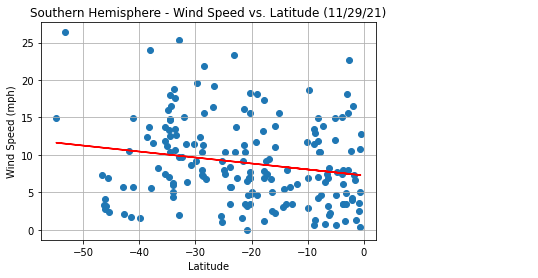

<Figure size 432x288 with 0 Axes>

In [45]:
s_lat_scatter = weather_data.loc[weather_data["Lat"] < 0, "Lat"]
s_wind_scatter = weather_data.loc[weather_data["Lat"] < 0, "Wind Speed"]

#correlation r-value
ntl_r = st.pearsonr(s_lat_scatter, s_wind_scatter)
print(f"The r-value is: {round(ntl_r[0],2)}.")

#linear regression
#changed var types to float bc it was object and wouldn't produce a scatterplot
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_scatter.astype(float), s_wind_scatter.astype(float))
regress_values = s_lat_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")

#plot linear regression line
plt.scatter(s_lat_scatter, s_wind_scatter)
plt.plot(s_lat_scatter,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#add labels and save file
plt.title("Southern Hemisphere - Wind Speed vs. Latitude (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

plt.savefig("../../python-api-challenge/WeatherPy/southern_lat_vs_wind_plot.png")

These pair of plots shows very different relationships, although both have very weak correlations. In the Northern hemisphere, there does not seem to be a difference in wind speed as latitude increases, since the linear regression line is pretty flat. However, in the Southern hemisphere, wind speed seems to generally decrease as latitude increases.